In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pathlib import Path
import matplotlib

plt.style.use("default")
plt.rcParams.update({
    'figure.dpi': 200,  # renders images larger for notebook
    'axes.grid': True,
    'grid.alpha': 0.3,
})

print(Path.cwd().parent)
DATA_PATH = Path.cwd().parent / "../data"

c:\Users\tpiepe\Repositories\hardcore-magnet-challenge\Model


In [72]:
loc_h_est = DATA_PATH / "additional_data/CNN_H_preds_ea89c.csv/CNN_H_preds_ea89c.csv"
loc_p_est = DATA_PATH / "additional_data/CNN_P_preds_ea89c.csv/CNN_P_preds_ea89c.csv"

h_est_md = np.genfromtxt(loc_h_est, delimiter=',')
p_est_md = np.genfromtxt(loc_p_est, delimiter=',')
print(h_est_md.shape)
print(p_est_md.shape)
h_est_md = h_est_md[:, 0:-1]
p_est_md = p_est_md[:, 0:-1]
print(h_est_md.shape)
print(p_est_md.shape)

(17778, 1025)
(17778, 2)
(17778, 1024)
(17778, 1)


In [73]:
loc_b = DATA_PATH / "2023 MagNet Challenge Testing Data (Public)/Training/Material A/B_Field.csv"
loc_h = DATA_PATH / "2023 MagNet Challenge Testing Data (Public)/Training/Material A/H_Field.csv"
loc_p = DATA_PATH / "2023 MagNet Challenge Testing Data (Public)/Training/Material A/Volumetric_Loss.csv"
loc_f = DATA_PATH / "2023 MagNet Challenge Testing Data (Public)/Training/Material A/Frequency.csv"
b_gt = np.genfromtxt(loc_b, delimiter=',')
h_gt = np.genfromtxt(loc_h, delimiter=',')
p_gt = np.genfromtxt(loc_p, delimiter=',')
f_gt = np.genfromtxt(loc_f, delimiter=',')
print(b_gt.shape)
print(f_gt.shape)

(2432, 1024)
(2432,)


In [74]:
def shoelace(b, h, f):
    """Given the B and H curve as well as the frequency in """
    # offset polygon into first quadrant
    b, h = (
       b/1000 + 0.5,  # T
       h + 1000,  # A/m
    )
    return (
        f
        * 0.5
        * np.abs(np.sum(b * (np.roll(h, 1, axis=0) - np.roll(h, -1, axis=0)), axis=0))
    ) 

def bh_int(b, h, f):
    """Given the B and H curve as well as the"""
    b = b/1000
    return (
        f * np.trapezoid(h * np.gradient(b))
    ) 


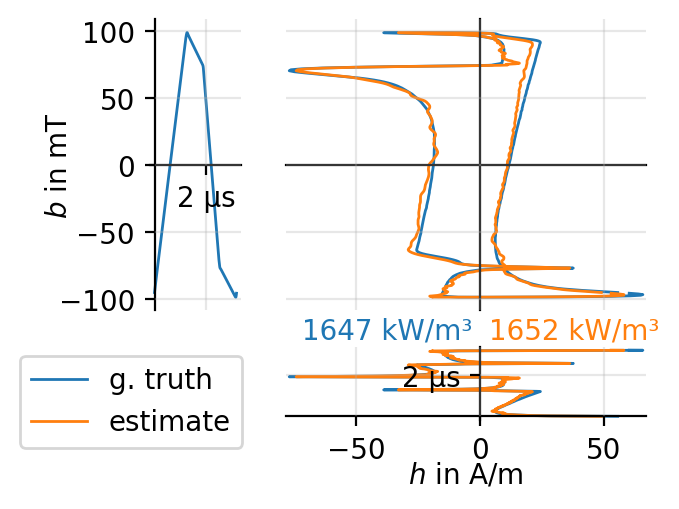

In [75]:
plt.rcParams["axes.axisbelow"] = False

number = 1400  # in paper
# number = 16
# number = 1

# color_tabs = ["tab:blue", "tab:orange", "tab:green" ]
b = b_gt[number]*1000
h = h_gt[number]
h_est = h_est_md[number]
f = f_gt[number]
t = np.linspace(0, 1/f, 1024)*1e6


fig = plt.subplots(nrows=2, ncols=2, figsize=(3.2, 2.6), width_ratios=(0.5, 2),height_ratios=(2, 0.5),)
axb = plt.subplot(221)
axh = plt.subplot(224)
axbh = plt.subplot(222)
# axbh = plt.subplot(222, sharey=axb, sharex=axh)  # leads to problem in newest matplotlib version
axbh.sharex(axh)
axbh.sharey(axb)
tbd = plt.subplot(223)

# Remove bot left plot
plt.delaxes(tbd)

# Center the axes
# top left
axb.spines[["left"]].set_position(("data", 0))
axb.spines[["bottom"]].set_position(("data", 0))
axb.spines[["top"]].set_visible(False)
axb.spines[["right"]].set_visible(False)

# top right
axbh.spines[["right"]].set_position(("data", 0))
axbh.spines[["top"]].set_position(("data", 0))
axbh.spines[["left"]].set_visible(False)
axbh.spines[["bottom"]].set_visible(False)

# bot right
axh.spines[["left"]].set_position(("data", 0))
axh.spines[["bottom"]].set_position(("data", 0))
axh.spines[["top"]].set_visible(False)
axh.spines[["right"]].set_visible(False)


axb.plot(t, b, color="tab:blue", linewidth=1)
axh.plot(h, t, color="tab:blue", label="g. truth", linewidth=1)
axh.plot(h_est, t, color="tab:orange", label="estimate", linewidth=1)
axbh.plot(h, b, color="tab:blue", linewidth=1)
axbh.plot(h_est, b, color="tab:orange", linewidth=1)

# Power Losses in BH curve
axbh.text(0.28, -0.07, f'{int(np.round(p_gt[number]/1000, 0))} kW/m³', color="tab:blue", horizontalalignment='center', verticalalignment='center', transform=axbh.transAxes)
axbh.text(0.8, -0.07, f'{int(np.round(p_est_md[number][0]/1000, 0))} kW/m³',color="tab:orange", horizontalalignment='center', verticalalignment='center', transform=axbh.transAxes)

axb.set_ylabel("$b$ in mT", labelpad=-5)
axh.set_xlabel("$h$ in A/m", labelpad=-1)


axb.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d µs'))
axb.set_xticks(axb.get_xticks()[2:3])

axh.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d µs'))
axh.set_yticks(axh.get_yticks()[2:3])

axbh.grid(True)

for tick in axbh.xaxis.get_major_ticks():
     tick.tick1line.set_visible(False)
     tick.tick2line.set_visible(False)
     tick.label1.set_visible(False)
     tick.label2.set_visible(False)
for tick in axbh.yaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)

# Legend for all subplots
handles, labels = axh.get_legend_handles_labels()
fig[0].legend(handles, labels, bbox_to_anchor=(0.29, 0.26))

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)
plt.margins(0.01)
# plt.tight_layout()
plt.savefig("C:/Users/tpiepe/Repositories/magnet-challenge-2023/notebooks/BH_estimation.pdf", bbox_inches="tight")

plt.show()

# shoelace vs. trapz

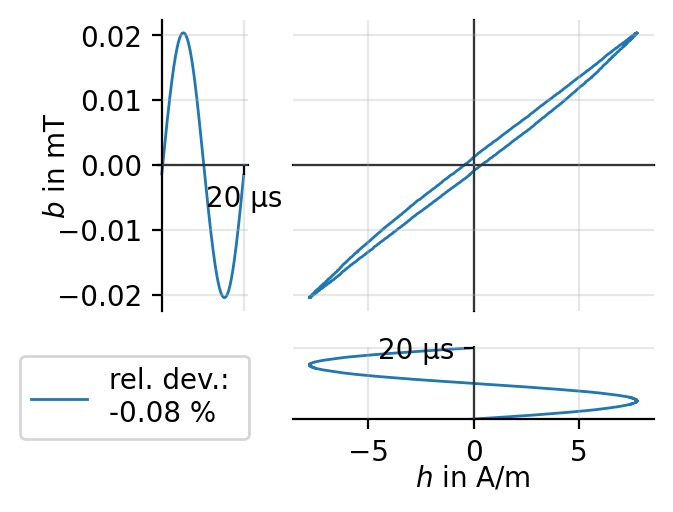

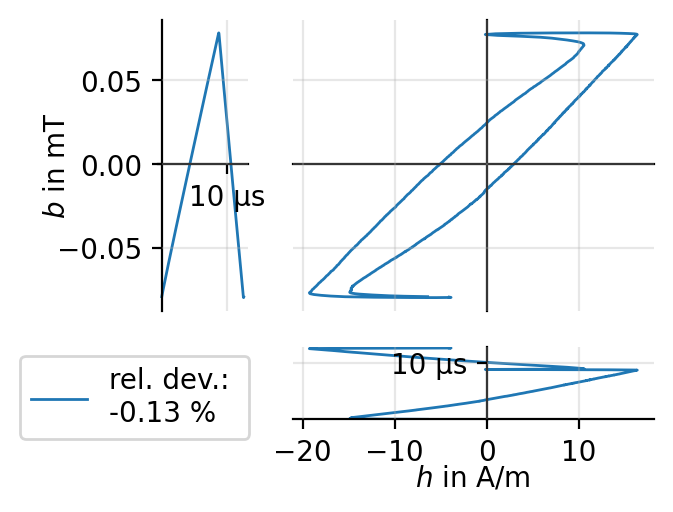

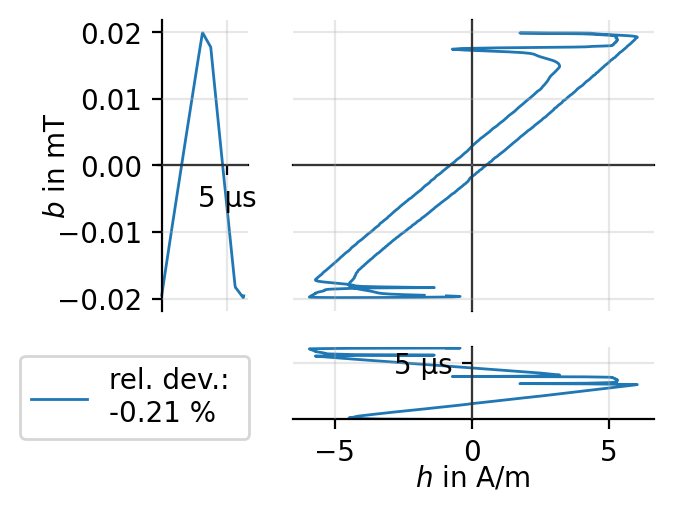

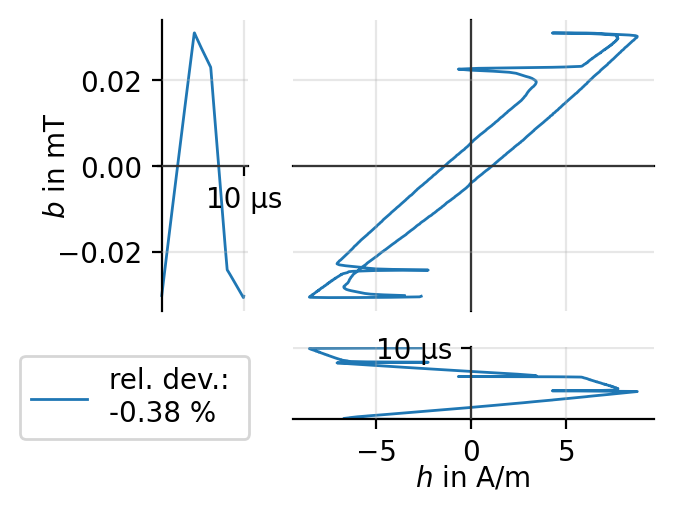

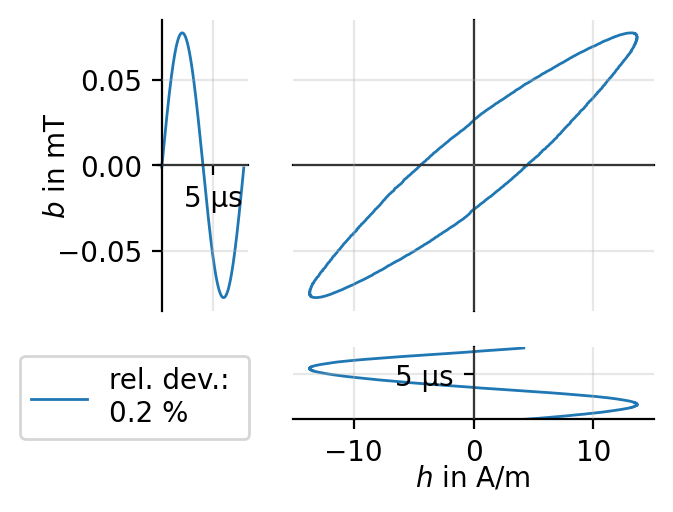

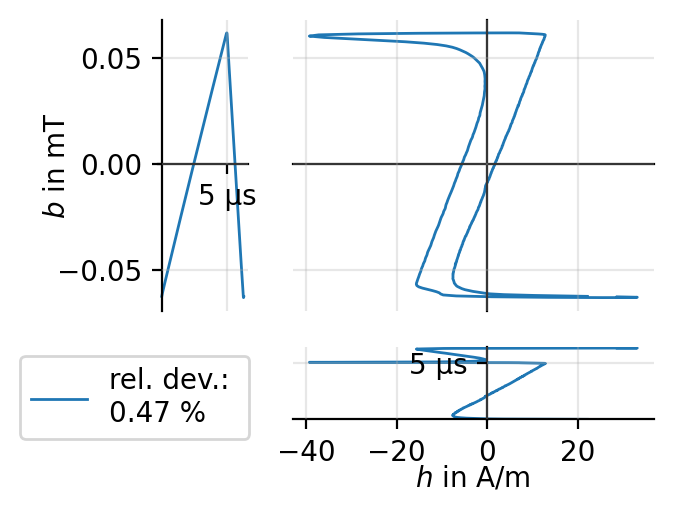

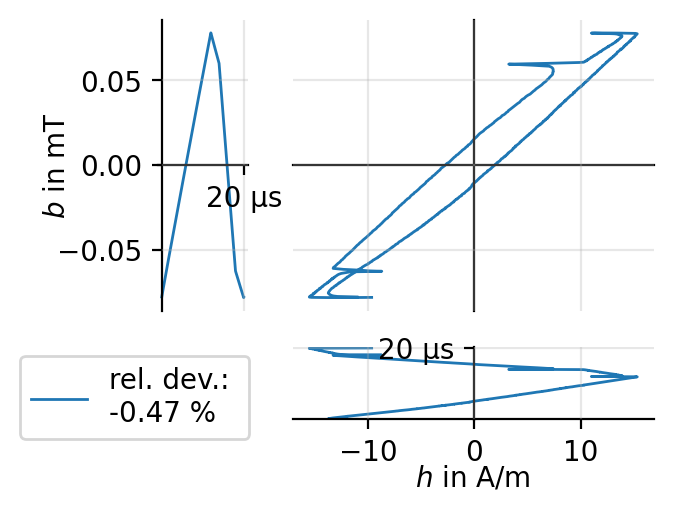

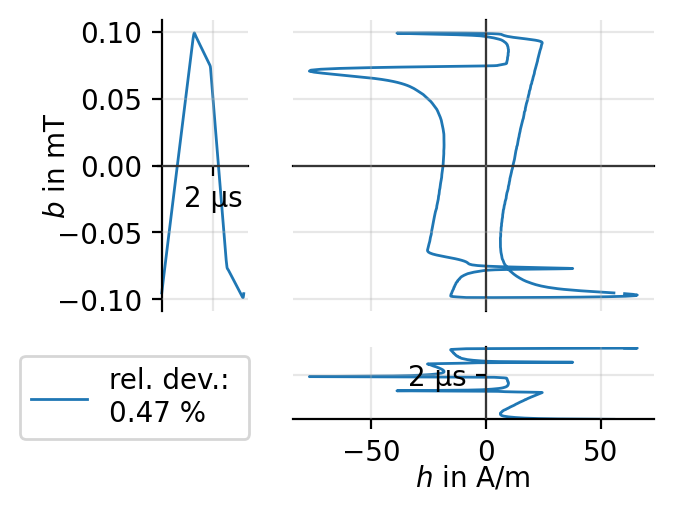

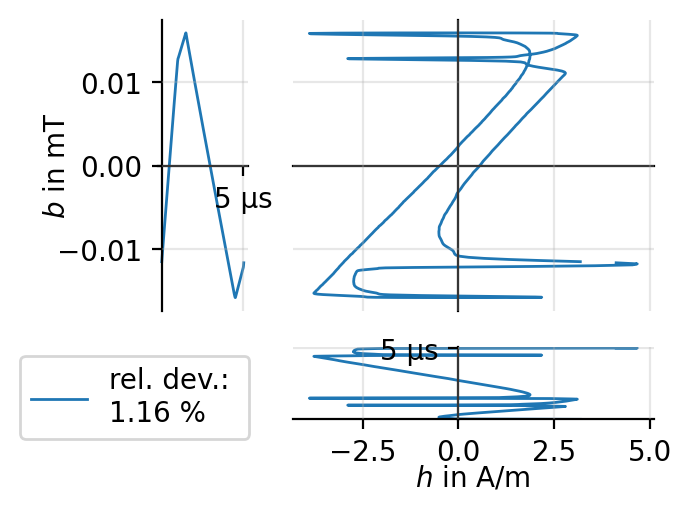

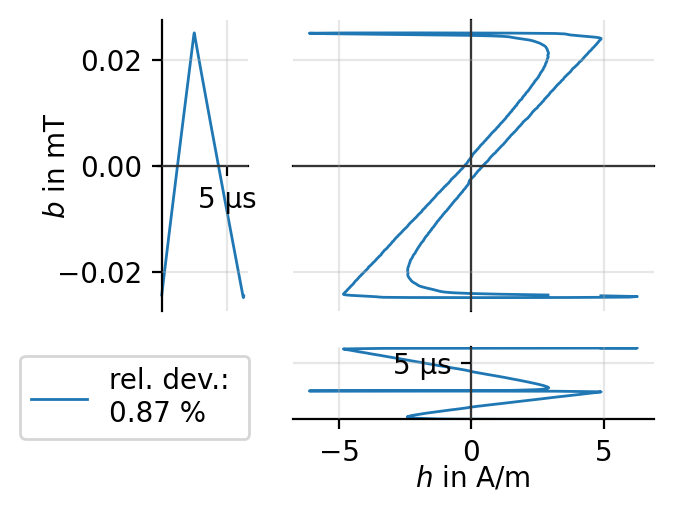

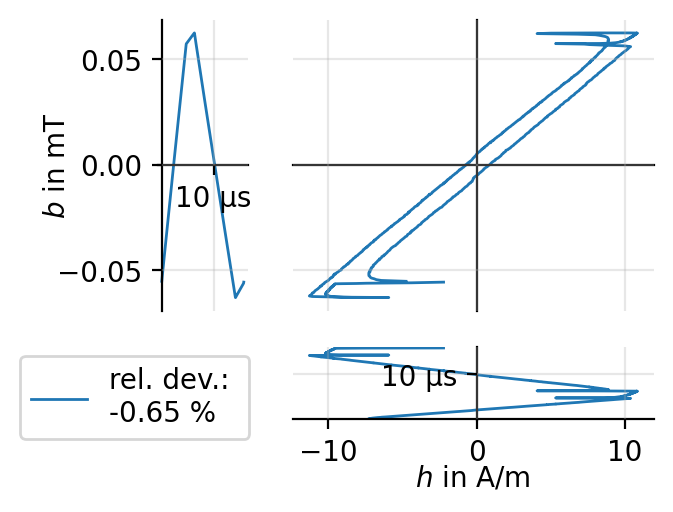

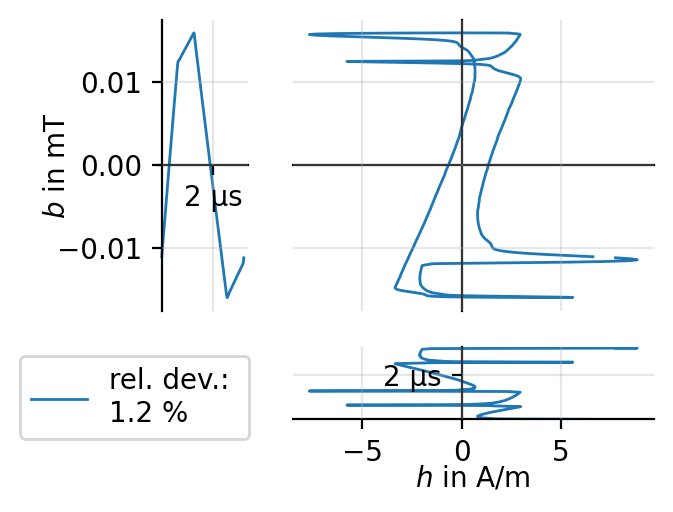

In [76]:
plt.rcParams["axes.axisbelow"] = False

number = 1400  # in paper
# number = 500
# number = 16 # good
# number = 10 # sine
# number = 1 # sine

# color_tabs = ["tab:blue", "tab:orange", "tab:green" ]

for number in range(0, 2400, 200):
    subsampling = 1
    b = b_gt[number][::subsampling]
    h = h_gt[number][::subsampling]
    f = f_gt[number]
    t = np.linspace(0, 1/f, 1024)*1e6
    t = t[::subsampling]

    p_sho = shoelace(b, h, f)
    p_bh_int = bh_int(b, h, f)
    rel_deviation = (p_sho-p_bh_int)/p_bh_int
    # print(f"shoelace: {p_sho}")
    # print(f"bh_int: {p_bh_int}")
    # print(f"rel. deviation: {rel_deviation}")

    # ----
    fig = plt.subplots(nrows=2, ncols=2, figsize=(3.2, 2.6), width_ratios=(0.5, 2),height_ratios=(2, 0.5),)
    axbh = plt.subplot(222)
    axb = plt.subplot(221)
    axh = plt.subplot(224)

    # axbh = plt.subplot(222, sharey=axb, sharex=axh)  # leads to problem in newest matplotlib version
    axbh.sharex(axh)
    axbh.sharey(axb)
    tbd = plt.subplot(223)

    # Remove bot left plot
    plt.delaxes(tbd)

    # Center the axes
    # top left
    axb.spines[["left"]].set_position(("data", 0))
    axb.spines[["bottom"]].set_position(("data", 0))
    axb.spines[["top"]].set_visible(False)
    axb.spines[["right"]].set_visible(False)
    # top right
    axbh.spines[["left"]].set_visible(False)
    axbh.spines[["bottom"]].set_visible(False)
    axbh.spines[["right"]].set_position(("data", 0))
    axbh.spines[["top"]].set_position(("data", 0))
    # bot right
    axh.spines[["left"]].set_position(("data", 0))
    axh.spines[["bottom"]].set_position(("data", 0))
    axh.spines[["top"]].set_visible(False)
    axh.spines[["right"]].set_visible(False)

    axb.plot(t, b, color="tab:blue", linewidth=1)
    axh.plot(h, t, color="tab:blue", label=f"rel. dev.: \n{np.round(rel_deviation*100, 2)} %", linewidth=1)
    axbh.plot(h, b, color="tab:blue", linewidth=1)
    axb.set_ylabel("$b$ in mT", labelpad=-5)
    axh.set_xlabel("$h$ in A/m", labelpad=-1)

    axb.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d µs'))
    axb.set_xticks(axb.get_xticks()[2:3])

    axh.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d µs'))
    axh.set_yticks(axh.get_yticks()[2:3])

    axbh.grid(True)
    for tick in axbh.xaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)
    for tick in axbh.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)

    # Legend for all subplots
    handles, labels = axh.get_legend_handles_labels()
    fig[0].legend(handles, labels, bbox_to_anchor=(0.29, 0.26))

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
    plt.margins(0.01)
    # plt.tight_layout()
    # plt.close(fig=fig)
    plt.savefig(f"C:/Users/tpiepe/Repositories/magnet-challenge-2023/data/additional_data/shoelace_validation/test_3/{number}.png", transparent=True, bbox_inches="tight")
    # plt.savefig(f"C:/Users/tpiepe/Repositories/magnet-challenge-2023/notebooks/shoelace_test_{number}.pdf", bbox_inches="tight")
